In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [7]:
def detect_line_ransac(points, max_iterations, distance_threshold):
    best_line = None
    max_inliers = 0
    for _ in range(max_iterations):
        sample_points = points[np.random.choice(points.shape[0], 2, replace=False)]
        x1, y1 = sample_points[0]
        x2, y2 = sample_points[1]
        A = y2 - y1
        B = x1 - x2
        C = x2 * y1 - x1 * y2
        disatnce = np.abs(A*points[:,0] + B * points[:,1] + C) / np.sqrt(A**2 + B**2)
        inliers = points[disatnce < distance_threshold]
        if len(inliers) > max_inliers:
            best_line = (A, B, C)
            max_inliers = len(inliers)
    return best_line, inliers

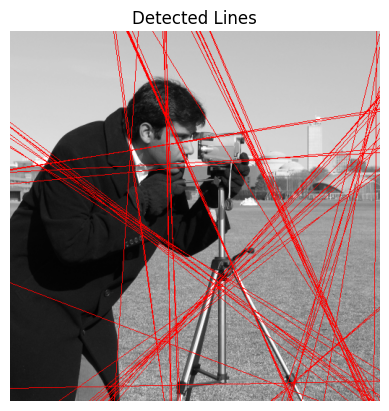

In [20]:
image = data.camera()
edges = cv2.Canny(image, 50, 150, apertureSize = 3)
max_iteration = 100
distance_threshold = 10
line_detected = []
points = np.column_stack(np.where(edges > 0))
while len(points) > 50:
    best_line, inliners = detect_line_ransac(points, max_iteration, distance_threshold)
    if best_line is not None:
        line_detected.append(best_line)
        points = np.array([pt for pt in points if pt.tolist() not in inliners.tolist()])
        
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for A, B, C in line_detected:
    if B != 0:
        x1, x2 = 0, image.shape[1]
        y1 = int(-C/B)
        y2 = int(-(A*x2+C)/B)
    else:
        y1, y2 = 0, image.shape[0]
        x1 = int(-C / A)
        x2 = int(-C / A)
    cv2.line(output_image, (x1, y1), (x2, y2), (255, 0, 0), 1)
plt.imshow(output_image)
plt.axis('off')
plt.title("Detected Lines")
plt.show()

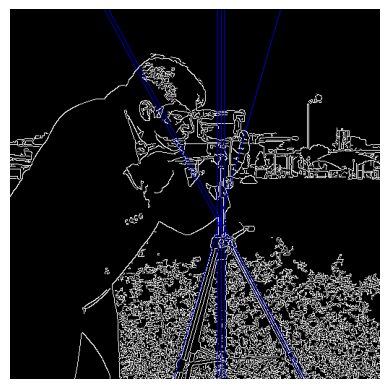

In [25]:
import math
src = data.camera()
dst = cv2.Canny(src, 50, 200, None, 3)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
lines = cv2.HoughLines(dst, 1, np.pi / 180, 180, None, 0, 0)
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0, 0, 255), 1)
plt.axis('off')
plt.imshow(cdst)